**Statistical Question:**

The central statistical question that I am exploring is if it is possible to predict the profitability of a film, with a high degree of certainty, using multiple regression?

I hypothesize that we will be able to create a strong, yet incomplete model from the data in the Kaggle TMDB 5000 Movie dataset.

In [407]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import matplotlib
import matplotlib.pyplot as plt
import statistics
import statsmodels.formula.api as smf

df = pd.read_csv('/Users/Love/Documents/Projects/tmdb-5000-movie-dataset/tmdb_5000_movies.csv')
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

**Variables:**
    
1. Budget: Estimated budgets of each film, in USD.
2. Genres: Film categories that each film, and there can be multiple genres for each film.
3. Homepage: This is the website URL setup to provide information on the film.
4. ID: Unique identifier for each film.
5. Keywords: User-definied keywords that relate to the film and it's subject matter.
6. Original_language: Language the film was first recorded in.
7. Original_title: Title given to a film during it's production and may different from the final title seen on it's release.
8. Overview: This is a synopsis of the film.
9. Popularity: This is an aggregate value of the number of times this page was visited on TheMovieDatabase.com.
10. Production_companies: Companies responsible for the financing, releasing, and production of the film.
11. Production_countries: Countries the film was recorded in during production.
12. Release_date: Date the film had it's theatrical release.
13. Revenue: Amount of money grossed at the boxoffice for the film.
14. Runtime: Length of time the film runs.
15. Spoken_languages: Languages that the film was recorded in, plus any it was translated to for distribution.
16. Status: This is the production status; it is either released, post-production, or rumored.
17. Tagline: This is the marketing slogan given to the film.
18. Title: This is the name the film had upon it's release.
19. Vote_average: This is the average rating given to each film, on a scale of 1 - 10.
20. Vote_count: This is the number of votes cast for each film in the vote_average variable.

**Five Analysis Variables:**

The five variables that I have chosen to explore are film's budget, the revenue, the runtime, the vote_average, and another variable that will need to be added, which is profit.

A film's budget is extremely important, since I hypothesize that for audiences to feel a movie is worth seeing in the theater, that it must be a large-scale film with explosions and special effects; both of which significantly drive up a film's budget.

A film's revenue is an important metric to consider, since it represents how much money a film pulled in at the box office.

A film's runtime is one that could be important for the same reason as a budget. I hypothesize that for audiences to feel a movie is worth seeing in the theater, that it must be a longer film, so feel as if they are getting their money's worth on entertainment.

A film's vote_average is important because it is a measure of the film's quality; how much audiences enjoyed the film after seeing it. Although this will not drive up opening weekend numbers, it will drive word-of-mouth. I hypothesize that the higher a movie's quality, then the more money it will make.

Lastly, is the metric that will be used to measure a film's success; it's profit. This is a variable that I will need to create by subtracting revenue from budget.

**Data Cleaning**

I can remove Post Production and Rumored data. Only Released files are able to allow us to do the analysis we need.

In [408]:
len(df)

4803

In [409]:
df1 = df[df.status == 'Released']
len(df1)

4795

This removed 8 erroneous records.

Next, in order to see accurate user vote analysis, we only need data with vote_average records. So, I can remove records without at least 30 rows of data.

In [410]:
df2 = df1[df1.vote_count >= 30]
len(df2)

3946

Next, in order to see accurate revenue analysis, we only need films with revenue data associated to them. So, I can remove records without revenue data.

In [411]:
df3 = df2[df2.revenue >= 1]
len(df3)

3183

Next, in order to see accurate budget analysis, we only need data with budget records. So, I can remove records without budget data.

In [412]:
df4 = df3[df3.budget >= 1]
len(df4)

3063

Next, I will look for NAs.

In [413]:
df4.isnull().any()

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                False
popularity              False
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                 False
spoken_languages        False
status                  False
tagline                  True
title                   False
vote_average            False
vote_count              False
dtype: bool

Remove all unneeded columns from the dataframe

In [414]:
filmsdata = pd.DataFrame(df4, columns = ['title', 'budget', 'revenue', 'runtime', 'vote_average'])

Create my new calculated column for profit

In [415]:
filmsdata['profit'] = filmsdata.revenue - filmsdata.budget

In [416]:
len(filmsdata)

3063

(array([733., 607., 496., 259., 212., 213., 134.,  87.,  56.,  32.,  53.,
         28.,  50.,  18.,  23.,  13.,  22.,   4.,   5.,   1.,   1.,  12.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000000e+00, 1.18750010e+07, 2.37500009e+07, 3.56250009e+07,
        4.75000009e+07, 5.93750008e+07, 7.12500008e+07, 8.31250008e+07,
        9.50000008e+07, 1.06875001e+08, 1.18750001e+08, 1.30625001e+08,
        1.42500001e+08, 1.54375001e+08, 1.66250001e+08, 1.78125001e+08,
        1.90000000e+08, 2.01875000e+08, 2.13750000e+08, 2.25625000e+08,
        2.37500000e+08, 2.49375000e+08, 2.61250000e+08, 2.73125000e+08,
        2.85000000e+08, 2.96875000e+08, 3.08750000e+08, 3.20625000e+08,
        3.32500000e+08, 3.44375000e+08, 3.56250000e+08, 3.68125000e+08,
        3.80000000e+08]),
 <a list of 32 Patch objects>)

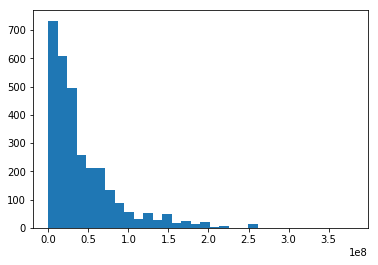

In [417]:
plt.hist(filmsdata.budget, bins=32)

(array([1.819e+03, 5.930e+02, 2.450e+02, 1.330e+02, 8.800e+01, 4.700e+01,
        3.500e+01, 2.300e+01, 2.400e+01, 1.300e+01, 1.700e+01, 8.000e+00,
        8.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([5.00000000e+00, 8.71239138e+07, 1.74247823e+08, 2.61371731e+08,
        3.48495640e+08, 4.35619549e+08, 5.22743458e+08, 6.09867367e+08,
        6.96991276e+08, 7.84115184e+08, 8.71239093e+08, 9.58363002e+08,
        1.04548691e+09, 1.13261082e+09, 1.21973473e+09, 1.30685864e+09,
        1.39398255e+09, 1.48110645e+09, 1.56823036e+09, 1.65535427e+09,
        1.74247818e+09, 1.82960209e+09, 1.91672600e+09, 2.00384991e+09,
        2.09097382e+09, 2.17809773e+09, 2.26522163e+09, 2.35234554e+09,
        2.43946945e+09, 2.52659336e+09, 2.61371727e+09, 2.70084118e+09,
        2.78796509e+09

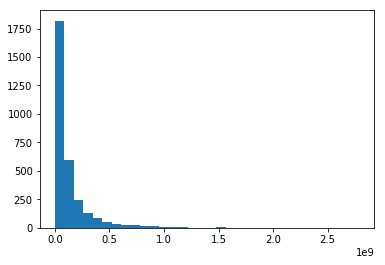

In [418]:
plt.hist(filmsdata.revenue, bins=32)

(array([  3.,  32., 216., 581., 578., 547., 429., 266., 172.,  83.,  56.,
         34.,  19.,  16.,  10.,  11.,   3.,   2.,   2.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 63.     ,  71.59375,  80.1875 ,  88.78125,  97.375  , 105.96875,
        114.5625 , 123.15625, 131.75   , 140.34375, 148.9375 , 157.53125,
        166.125  , 174.71875, 183.3125 , 191.90625, 200.5    , 209.09375,
        217.6875 , 226.28125, 234.875  , 243.46875, 252.0625 , 260.65625,
        269.25   , 277.84375, 286.4375 , 295.03125, 303.625  , 312.21875,
        320.8125 , 329.40625, 338.     ]),
 <a list of 32 Patch objects>)

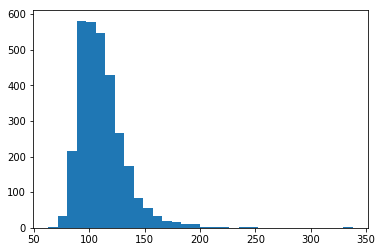

In [419]:
plt.hist(filmsdata.runtime, bins=32)

(array([ 10.,   8.,  64., 151., 464., 817., 698., 511., 284.,  56.]),
 array([3.  , 3.55, 4.1 , 4.65, 5.2 , 5.75, 6.3 , 6.85, 7.4 , 7.95, 8.5 ]),
 <a list of 10 Patch objects>)

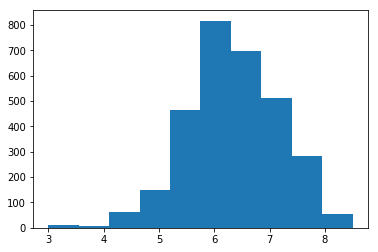

In [420]:
plt.hist(filmsdata.vote_average, bins=10)

(array([8.000e+00, 8.460e+02, 1.343e+03, 4.340e+02, 1.600e+02, 9.100e+01,
        5.000e+01, 3.700e+01, 2.600e+01, 2.100e+01, 1.200e+01, 1.700e+01,
        8.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1.65710090e+08, -8.08139907e+07,  4.08210856e+06,  8.89782078e+07,
         1.73874307e+08,  2.58770406e+08,  3.43666506e+08,  4.28562605e+08,
         5.13458704e+08,  5.98354804e+08,  6.83250903e+08,  7.68147002e+08,
         8.53043101e+08,  9.37939201e+08,  1.02283530e+09,  1.10773140e+09,
         1.19262750e+09,  1.27752360e+09,  1.36241970e+09,  1.44731580e+09,
         1.53221190e+09,  1.61710799e+09,  1.70200409e+09,  1.78690019e+09,
         1.87179629e+09,  1.95669239e+09,  2.04158849e+09,  2.12648459e+09,
         2.21138069e+09,  2.29627679e+09,  2.38117289e+09,  2.4660

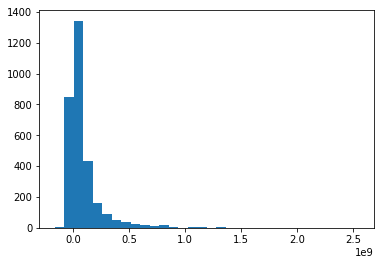

In [421]:
plt.hist(filmsdata.profit, bins=32)

In [422]:
filmsdatamean = round(filmsdata.mean())
filmsdatavar = round(filmsdata.var())
filmsdatastd = round(filmsdata.std())
print('Mean Values:')
filmsdatamean

Mean Values:


budget           42297943.0
revenue         127429483.0
runtime               111.0
vote_average            6.0
profit           85131540.0
dtype: float64

In [423]:
print('Variance Values:')
filmsdatavar

Variance Values:


budget          2.014437e+15
revenue         3.582998e+16
runtime         4.410000e+02
vote_average    1.000000e+00
profit          2.594807e+16
dtype: float64

In [424]:
print('Standard Deviation Values:')
filmsdatastd

Standard Deviation Values:


budget           44882480.0
revenue         189288092.0
runtime                21.0
vote_average            1.0
profit          161084036.0
dtype: float64

In [425]:
print('Mode Values:')
print(round(statistics.mode(filmsdata.budget)))
# print(round(statistics.mode(filmsdata.revenue)))
print(round(statistics.mode(filmsdata.runtime)))
print(round(statistics.mode(filmsdata.vote_average)))
print(round(statistics.mode(filmsdata.profit)))

Mode Values:
20000000
100
6
-14000000


The runtime distribution is extremely skewed. Looking at the runtimes over 200 should shed some light on this.

In [426]:
runtimeoutlier = filmsdata[filmsdata.runtime > 200]

In [427]:
runtimeoutlier

,title,budget,revenue,runtime,vote_average,profit
329,The Lord of the Rings: The Return of the King,94000000,1118888979,201.0,8.1,1024888979
855,Gods and Generals,56000000,12923936,214.0,6.1,-43076064
1109,Heaven's Gate,44000000,3484331,219.0,6.4,-40515669
1125,Cleopatra,31115000,71000000,248.0,6.7,39885000
1387,Malcolm X,34000000,48169908,202.0,7.2,14169908
2384,Carlos,18000000,871279,338.0,6.7,-17128721
2550,Lawrence of Arabia,15000000,69995385,216.0,7.8,54995385
3813,Gone with the Wind,4000000,400176459,238.0,7.7,396176459
4497,Woodstock,600000,34505110,225.0,7.1,33905110
4535,Seven Samurai,2000000,271841,207.0,8.2,-1728159


Okay, the longest film, Carlos, in the dataset isn’t actually a feature film, but is instead a television miniseries. Therefore, it is not actually from the population in which we are looking to pull from and should be excluded. However, the others do appear to be legitimate feature films with theatrical releases.

Also, within the budget distribution there is a surprising amount of micro-budget movies and a movie that cost almost 400 million dollars. I’ve heard of Transformers and Avatar films costing 200 million, but this high of a number will need to be investigated.

In [428]:
budgetoutlier = filmsdata[filmsdata.budget > 200000000]

In [429]:
budgetoutlier

,title,budget,revenue,runtime,vote_average,profit
0,Avatar,237000000,2787965087,162.0,7.2,2550965087
1,Pirates of the Caribbean: At World's End,300000000,961000000,169.0,6.9,661000000
2,Spectre,245000000,880674609,148.0,6.3,635674609
3,The Dark Knight Rises,250000000,1084939099,165.0,7.6,834939099
4,John Carter,260000000,284139100,132.0,6.1,24139100
5,Spider-Man 3,258000000,890871626,139.0,5.9,632871626
6,Tangled,260000000,591794936,100.0,7.4,331794936
7,Avengers: Age of Ultron,280000000,1405403694,141.0,7.3,1125403694
8,Harry Potter and the Half-Blood Prince,250000000,933959197,153.0,7.4,683959197
9,Batman v Superman: Dawn of Justice,250000000,873260194,151.0,5.7,623260194


Only one record in the dataset that looks out of place is Pirates of the Caribbean: On Stranger Tides. It is recorded as 380 million dollars. However, other sources, do validate this amount. According to Forbes, it is actually 410 million dollars.

Source: https://www.forbes.com/sites/csylt/2014/07/22/fourth-pirates-of-the-caribbean-is-most-expensive-movie-ever-with-co #70a84bd8364f

So, let’s look at the other side of the ledger; the micro-budget films.

In [430]:
budget_outlier = filmsdata[filmsdata.budget < 1000]

In [431]:
budget_outlier

,title,budget,revenue,runtime,vote_average,profit
1562,Rugrats in Paris: The Movie,30,103,78.0,6.0,73
1771,The 51st State,28,14,93.0,5.9,-14
1912,Angela's Ashes,25,13,145.0,7.0,-12
3137,Nurse 3-D,10,10000000,99.0,4.9,9999990
3372,Split Second,7,5,90.0,5.7,-2
4238,Modern Times,1,8500000,87.0,8.1,8499999
4608,The Prophecy,8,16,98.0,6.4,8


After doing more research, none of these movies are legitimate. However, they are conversions not to the dollar, but instead 10 means 10 million for Nurse 3-D, according to The Guardian. Same with Rugrats, according to BoxOfficeMojo. According to the same source, the film actually only made 5k on limited release. The same million unit conversion also holds true for Rugrats revenue. Same for The 51st State, Split Second, and The Prophecy. However, according to BoxOfficeMojo, this isn’t true for Angela’s Ashes. In fact, it cost 50 million dollars to make and made $13,042,112. However, Modern times is completely off and can be removed.
https://www.theguardian.com/film/2015/jul/21/paz-de-la-huerta-sues-director-of-sex-horror-nurse-3d-for-ruining-her-career https://web.archive.org/web/20140401011944/http://boxofficemojo.com/movies/?id=rugratsinparis.htm https://www.the-numbers.com/movie/Angelas-Ashes#tab=summary https://www.the-numbers.com/ movie/Split-Second#tab=summary http://www.boxofficemojo.com/movies/?id=prophecy95.htm http://www.boxofficemojo.com/movies/?id=angelasashes.htm

In [432]:
filmsdata.set_value(1562, 'budget', 30000000)
filmsdata.set_value(1562, 'revenue', 103000000)
filmsdata.set_value(1771, 'budget', 28000000)
filmsdata.set_value(1771, 'revenue', 14000000)
filmsdata.set_value(3137, 'budget', 10000000)
filmsdata.set_value(3137, 'revenue', 5000)
filmsdata.set_value(4608, 'budget', 8000000)
filmsdata.set_value(4608, 'revenue', 16000000)
filmsdata.set_value(1912, 'budget', 50000000)
filmsdata.set_value(1912, 'revenue', 13042112)
filmsdata.set_value(3372, 'budget', 7000000)
filmsdata.set_value(3372, 'revenue', 5000000)
;

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: Futur

''

In [433]:
budget_outlier = filmsdata[filmsdata.budget < 1000]

In [434]:
budget_outlier

,title,budget,revenue,runtime,vote_average,profit
4238,Modern Times,1,8500000,87.0,8.1,8499999


In [435]:
filmsdata = filmsdata[filmsdata.budget > 1000]

In [436]:
revenue_outlier = filmsdata[filmsdata.revenue < 1000]

In [437]:
revenue_outlier

,title,budget,revenue,runtime,vote_average,profit
1655,Chasing Liberty,23000000,12,111.0,6.1,-22999988
2068,Death at a Funeral,9000000,46,90.0,6.9,-8999954
2874,In the Cut,12000000,23,119.0,4.6,-11999977


The revenues should be multiplied by 1,000,000. In the Cut should be 23 million, per BoxOfficeMojo. Same with Chasing Liberty. Same with Death at a Funeral.
http://www.boxofficemojo.com/movies/?id=inthecut.htm http://www.boxofficemojo.com/movies/?id= chasingliberty.htm http://www.boxofficemojo.com/movies/?id=deathatafuneral.htm

In [438]:
filmsdata.set_value(1655, 'revenue', 12000000)
filmsdata.set_value(2068, 'revenue', 46000000)
filmsdata.set_value(2874, 'revenue', 23000000)
;

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


''

Now, these minimums and maximums look better for runtime, budget, and revenue.

Next, I will use a PMF to research the relationship with film length and vote_average.

In [439]:
filmsdatahighvote = filmsdata[filmsdata.runtime > 90]
filmsdatalowvote = filmsdata[filmsdata.runtime <= 90]
filmsdatahighvoteruntime = filmsdatahighvote.vote_average
filmsdatalowvoteruntime = filmsdatalowvote.vote_average
highvoteruntime_pmf = thinkstats2.Pmf(filmsdatahighvoteruntime)
lowvoteruntime_pmf = thinkstats2.Pmf(filmsdatalowvoteruntime)
;

''

No handles with labels found to put in legend.


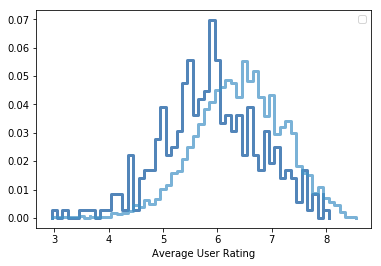

In [440]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([lowvoteruntime_pmf, highvoteruntime_pmf])
thinkplot.Show(xlabel='Average User Rating')

PMFs work well if the number of values is small, like vote_average. But as the number of values increases, like with revenue, the probability associated with each value gets smaller and the effecet of random noise increases. There problems can be mitigated by using the cumulative distribution function. The CDF is a function that maps from a value to its percentile rank.

{'xscale': 'linear', 'yscale': 'linear'}

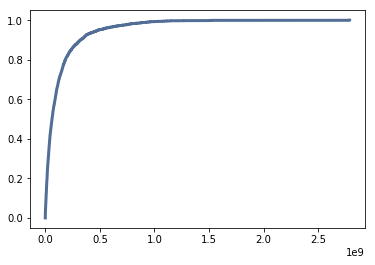

In [441]:
cdf = thinkstats2.Cdf(filmsdata.revenue, label='revenue')
thinkplot.Cdf(cdf)

One way to read this is that about 95% of films gross less than half a billion dollars.

The steepest portion of the graph is close closest to zero. Therefore, what this graph tells us is that most films don’t gross a lot of money at the box office, but a very small percentage gross an extraordinary amount of money.

This doesn’t directly address the question of if it is possible to predict, with a high level of certainty, if we can predict a film’s success, but it does let us know that what is most common amongst all the films is not likely what can best explain film success.

I have chosen to use the normal distribution analytical model to explore the budget variable. Based on what we learned in the last graph, that the vast majority of films do gross close to nothing, this means that we also know that the distribution of revenue is extremely skewed. Therefore, any reliable predictor of an extremely skewed distribution must itself be an extremely skewed.

Since I previously hypothesized that for audiences to feel a movie is worth seeing in the theater, that it must be a large-scale film with explosions and special effects; both of which significantly drive up a film's budget. Then, if this is to hold true, I expect the normal distribution to not be a good model for the budget variable.


In [442]:
mu, var = thinkstats2.TrimmedMeanVar(filmsdata.budget, p=0.01)
print('Mean, Var', mu, var)

Mean, Var 40771847.11492339 1616387883309983.2


In [443]:
max(filmsdata.budget)

380000000

In [444]:
min(filmsdata.budget)

7000

Sigma 40204326.67400342


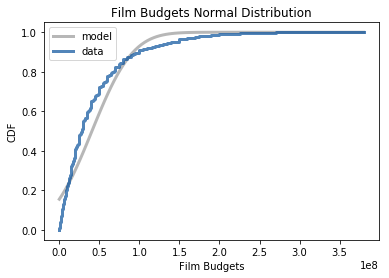

In [445]:
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=7000, high=380000000)

thinkplot.Plot(xs, ps, label='model', color='0.6')

cdf = thinkstats2.Cdf(filmsdata.budget, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Film Budgets Normal Distribution',
                 xlabel='Film Budgets',
                 ylabel='CDF')

Next, I will observe the relationship between profit and budget. I will begin by plotting a scatterplot of these two variables.

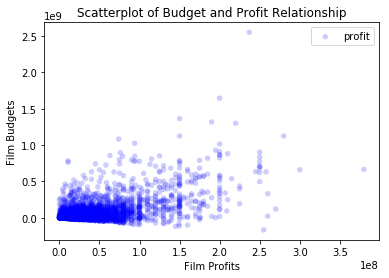

In [446]:
thinkplot.Scatter(filmsdata.budget, filmsdata.profit)
thinkplot.Show(xlabel='Film Profits',
               ylabel='Film Budgets',
               title='Scatterplot of Budget and Profit Relationship')

Next, we will calculate the covariance to measure the tendecy of the two variables to vary together.

In [447]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [448]:
Cov(filmsdata.budget, filmsdata.profit)

3929014024282456.0

Next, I will calculate a more useful, and standardized computation of this value.

In [449]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [450]:
Corr(filmsdata.budget, filmsdata.profit)

0.5438449953498812

Each correlation coefficient in the matrix can range between -1 and 1, with higher positive numbers meaning a closer relationship between the two variables, lower negative numbers meaning an inverse relationship and numbers near zero meaning no relationship.

Profit and Budget have a moderate positive value of .54, which implies a above average positive relationship. Meaning that as the budget of a film increases, then so does the profit the film generates on average. 

Looking at the scatterplot allows us to go beyond the Pearson correlation and look at if there is a nonlinear relationship between the variables that is not reflected in the correlation coefficient, which only measures linear relationships. However, looking at the scatterplot, there are no visible nonlinear relationship between profit and budget. It is instead a moderate linear relationship.

Next, I will observe the relationship between vote average and budget. I will begin by plotting a scatterplot of these two variables.

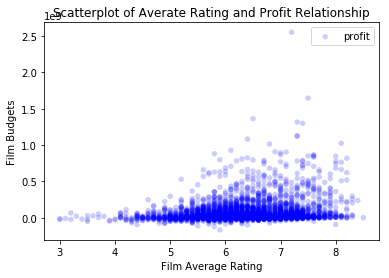

In [451]:
thinkplot.Scatter(filmsdata.vote_average, filmsdata.profit)
thinkplot.Show(xlabel='Film Average Rating',
               ylabel='Film Budgets',
               title='Scatterplot of Averate Rating and Profit Relationship')

Now, I will calculate the covariance.

In [452]:
Cov(filmsdata.vote_average, filmsdata.profit)

30489404.113659065

Next, I will calculate the Pearson correlation coefficient.

In [453]:
Corr(filmsdata.vote_average, filmsdata.profit + filmsdata.vote_average)

0.22829178515324627

Profit and Vote_Average have a low, positive value of .23, which implies a weak positive relationship. Meaning that as the quality of a film increases, then so does the profit the film generates on average, but only by a small margin.

Looking at the scatterplot allows us to go beyond the Pearson correlation and look at if there is a nonlinear relationship between the variables that is not reflected in the correlation coefficient, which only measures linear relationships. However, looking at the scatterplot, there are no visible nonlinear relationship between profit and average rating. It is instead a weak linear relationship.

Next, I will perform hypothesis testing on the correlation of runtime and profit. At the onset, I hypothosized that a film's runtime is one that could be important for the same reason as a budget. Reason being that for audiences to feel a movie is worth seeing in the theater, that it must be a longer film, so feel as if they are getting their money's worth on entertainment.

For my test statistic, I will use Pearson's correlation and I will do a two-sided test using the absolute correlation. The null hypothesis is that there is no correlation between a film's profit and a film's runtime.

In [461]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [464]:
data = filmsdata.runtime, filmsdata.profit
ht = CorrelationPermute(data)
pvalue = ht.PValue()

0.0

The reported p-value is 0, which means that in 1000 trials we didn't see a correlation, under the null hypothesis, that exceeded the observed correlation. That means that the p-value is probably smaller than  1/1000, but it is not actually 0.

To get a sense of how unexpected the observed value is under the null hypothesis, we can compare the actual correlation to the largest value we saw in the simulations.

In [466]:
ht.actual, ht.MaxTestStat()

(0.20515003442108085, 0.06697756646440245)

Next I will fit a multiple regression model, using profit as my dependent variable and budget + vote_average as a the independent variables.

In [459]:
formula = 'filmsdata.profit ~ filmsdata.budget + filmsdata.vote_average'
model = smf.ols(formula, data =filmsdata)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       filmsdata.profit   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     581.4
Date:                Sat, 11 Aug 2018   Prob (F-statistic):          5.65e-299
Time:                        15:56:53   Log-Likelihood:                -61518.
No. Observations:                3062   AIC:                         1.230e+05
Df Residuals:                    3058   BIC:                         1.231e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.09

This is a fairly weak model with an R-squared value of 0.363. Next, I will add runtime to my independent variables to see if the quality of my model improves.

In [460]:
formula = 'filmsdata.profit ~ filmsdata.budget + filmsdata.vote_average'
model = smf.ols(formula, data =filmsdata)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       filmsdata.profit   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     869.8
Date:                Sat, 11 Aug 2018   Prob (F-statistic):          8.24e-300
Time:                        15:58:25   Log-Likelihood:                -61519.
No. Observations:                3062   AIC:                         1.230e+05
Df Residuals:                    3059   BIC:                         1.231e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.18

Here, we see that the quality of our model did not improve at all. So, I will use the first model instead.

With this analysis, we can confirm my initial hypothesis that we create a strong, yet incomplete model from the data in the Kaggle TMDB 5000 Movie dataset. This is evidenced by the multiple regression model's R-squared value. This value provides a measure of how well the model as a whole explains the values of the dependent variable. Therefore, our model explains over 36% of the variation in a film's profit. Since models with more features always explain more variation, the adjusted R-squared value corrects R-squared by penalizing models with a large number of independent variables. For our model, R-squared and adjusted R-squared values are pretty much the same.

This analysis allows us to conclude that that runtime and quality, denoted by it’s average rating, don’t have a meaningful relationship on the film’s financial success, but the film’s budget does have a significant impact. Therefore, it can be said that to maximize ones profitability, one must make a significant investment in terms of budget. However, if you are to make a smart investment, then more must be known regarding the film in question, since our model only predicts at most a mediocre amount of the variability in the film’s financial success.